
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
data = pd.read_csv('data/shopping_trends.csv')
df = data.copy()

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [239]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [240]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [241]:
df.describe(include=['object'])[['Gender', 'Category', 'Color', 'Item Purchased']]

,Gender,Category,Color,Item Purchased
count,3900,3900,3900,3900
unique,2,4,25,25
top,Male,Clothing,Olive,Blouse
freq,2652,1737,177,171


In [242]:
(df['Gender'].value_counts(normalize=True)*100).reset_index()

,Gender,proportion
0,Male,68.0
1,Female,32.0


In [243]:
(df['Category'].value_counts(normalize=True)*100).reset_index()

,Category,proportion
0,Clothing,44.538462
1,Accessories,31.794872
2,Footwear,15.358974
3,Outerwear,8.307692


In [244]:
(df['Season'].value_counts(normalize=True)*100).reset_index()

,Season,proportion
0,Spring,25.615385
1,Fall,25.000000
2,Winter,24.897436
3,Summer,24.487179


Мужчины чаще покупают обувь осенью. (Неверно. Чаще мужчины покупают обувь летом.)

In [245]:
men_footwear_fall = data[(data['Gender'] == 'Male') & (data['Season'] == 'Fall') & (data['Category'] == 'Footwear')]
men_footwear_spring = data[(data['Gender'] == 'Male') & (data['Season'] == 'Spring') & (data['Category'] == 'Footwear')]
men_footwear_summer = data[(data['Gender'] == 'Male') & (data['Season'] == 'Summer') & (data['Category'] == 'Footwear')]
men_footwear_winter = data[(data['Gender'] == 'Male') & (data['Season'] == 'Winter') & (data['Category'] == 'Footwear')]
men_footwear = data[(data['Gender'] == 'Male') & (data['Category'] == 'Footwear')]

ratio_fall = len(men_footwear_fall) / len(men_footwear)
ratio_spring = len(men_footwear_spring) / len(men_footwear)
ratio_winter = len(men_footwear_winter) / len(men_footwear)
ratio_summer = len(men_footwear_summer) / len(men_footwear)

print(f'Осень: {ratio_fall}')
print(f'Весна: {ratio_spring}')
print(f'Зима: {ratio_winter}')
print(f'Лето: {ratio_summer}')

Осень: 0.2375
Весна: 0.2425
Зима: 0.2375
Лето: 0.2825


Женщины старше 40 лет чаще покупают весной. (Верно.)

In [246]:
women_40 = data[(data['Gender'] == 'Female') & (data['Age'] > 40)]
women_40_spring = data[(data['Gender'] == 'Female') & (data['Age'] > 40) & (data['Season'] == 'Spring')]
women_40_summer = data[(data['Gender'] == 'Female') & (data['Age'] > 40) & (data['Season'] == 'Summer')]
women_40_fall = data[(data['Gender'] == 'Female') & (data['Age'] > 40) & (data['Season'] == 'Fall')]
women_40_winter = data[(data['Gender'] == 'Female') & (data['Age'] > 40) & (data['Season'] == 'Winter')]

ratio_spring = len(women_40_spring) / len(women_40)
ratio_summer = len(women_40_summer) / len(women_40)
ratio_fall = len(women_40_fall) / len(women_40)
ratio_winter = len(women_40_winter) / len(women_40)


print(f'Осень: {ratio_fall}')
print(f'Весна: {ratio_spring}')
print(f'Зима: {ratio_winter}')
print(f'Лето: {ratio_summer}')

Осень: 0.25837988826815644
Весна: 0.25977653631284914
Зима: 0.22905027932960895
Лето: 0.2527932960893855


Женщины младше 40 предпочитают несколько ярких цветов всем остальным тёмным и светлым цветам. (Неверно.)

In [247]:
light_colors = ['White', 'Blue', 'Pink', 'Yellow', 'Red', 'Orange', 'Lavender']
women_40_minus = data[(data['Gender'] == 'Female') & (data['Age'] < 40)]

women_40_minus_colors = women_40_minus['Color'].value_counts(normalize=True)
light_color_ratio = women_40_minus_colors[light_colors].sum()

print(f'Доля женщин младше 40, предпочитающих указанные цвета: {light_color_ratio}')
print()
print(women_40_minus_colors)

Доля женщин младше 40, предпочитающих указанные цвета: 0.2829076620825148

Color
Yellow       0.053045
Magenta      0.053045
Silver       0.049116
Olive        0.047151
Pink         0.047151
Indigo       0.045187
Maroon       0.045187
Green        0.045187
Gray         0.043222
Orange       0.043222
Brown        0.043222
Teal         0.041257
Charcoal     0.041257
Blue         0.041257
Cyan         0.039293
Peach        0.039293
White        0.037328
Gold         0.035363
Violet       0.033399
Lavender     0.031434
Purple       0.031434
Black        0.029470
Red          0.029470
Turquoise    0.027505
Beige        0.027505
Name: proportion, dtype: float64


Чаще всего люди покупают одежду черного цвета. (Неверно. Самый популярный цвет - оливковый.)

In [248]:
color = ['Black']
all_counts = data['Color'].value_counts(normalize=True)
black_color_ratio = all_counts[color].sum()
print(f'Доля людей, предпочитающих указанные цвета: {black_color_ratio}')
print()
print(all_counts)

Доля людей, предпочитающих указанные цвета: 0.04282051282051282

Color
Olive        0.045385
Yellow       0.044615
Silver       0.044359
Teal         0.044103
Green        0.043333
Black        0.042821
Cyan         0.042564
Violet       0.042564
Gray         0.040769
Maroon       0.040513
Orange       0.039487
Charcoal     0.039231
Pink         0.039231
Magenta      0.038974
Blue         0.038974
Purple       0.038718
Peach        0.038205
Red          0.037949
Beige        0.037692
Indigo       0.037692
Lavender     0.037692
Turquoise    0.037179
White        0.036410
Brown        0.036154
Gold         0.035385
Name: proportion, dtype: float64


Подписчики в основном приобретают более дорогие товары, чем люди без подписки. (Неверно.)

In [249]:
subscribed = data[data['Subscription Status'] == 'Yes']
average_subscribed = subscribed['Purchase Amount (USD)'].mean()
average = data[data['Subscription Status'] == 'No']['Purchase Amount (USD)'].mean()

print(f'Средняя сумма покупки подписчика: {average_subscribed}')
print(f'Средняя сумма покупки человека без подписки: {average}')

Средняя сумма покупки подписчика: 59.49192782526116
Средняя сумма покупки человека без подписки: 59.865121180189675


<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

In [250]:
most_popular_item = data['Item Purchased'].value_counts().idxmax()

/var/folders/lb/7qhs8szj79v9xqf1qwpg3_b40000gn/T/ipykernel_8483/3031806803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Set1')


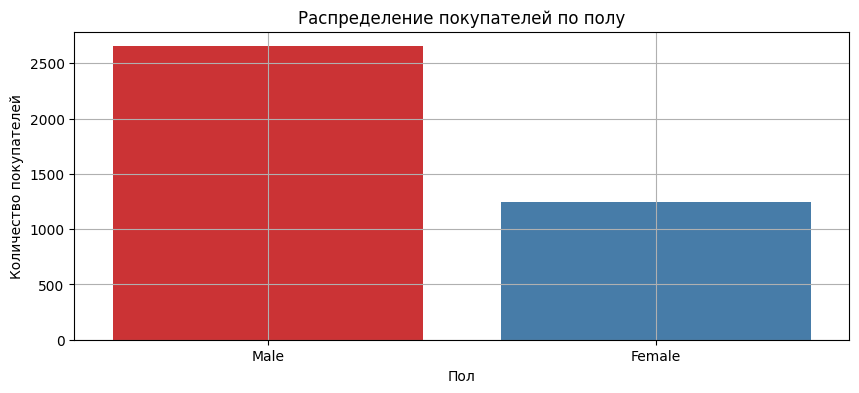

In [251]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Gender', data=data, palette='Set1')
plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество покупателей')
plt.grid(True)
plt.show()

In [252]:
top_gender_by_count = data['Gender'].value_counts().idxmax()
top_age_by_count = data['Age'].value_counts().idxmax()

In [253]:
top_gender_by_sum = data.groupby('Gender')['Purchase Amount (USD)'].mean().idxmax()
top_age_by_sum = data.groupby('Age')['Purchase Amount (USD)'].mean().idxmax()

In [254]:
color_season_df = data.groupby(['Season', 'Color']).size().unstack(fill_value=0)

In [255]:
color_season_df.describe()

Color,Beige,Black,Blue,Brown,Charcoal,Cyan,Gold,Gray,Green,Indigo,...,Peach,Pink,Purple,Red,Silver,Teal,Turquoise,Violet,White,Yellow
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,36.750000,41.750000,38.000000,35.250000,38.250000,41.500000,34.50000,39.750000,42.250000,36.750000,...,37.250000,38.250000,37.750000,37.000000,43.250000,43.000000,36.250000,41.500000,35.500000,43.500000
std,2.061553,1.258306,6.055301,3.304038,5.188127,1.732051,3.41565,9.105859,6.020797,3.685557,...,9.287088,7.632169,4.112988,4.690416,10.531698,5.477226,6.601767,3.696846,6.557439,5.507571
min,34.000000,40.000000,32.000000,33.000000,32.000000,39.000000,30.00000,27.000000,37.000000,32.000000,...,24.000000,29.000000,33.000000,31.000000,37.000000,37.000000,27.000000,37.000000,27.000000,38.000000
25%,36.250000,41.500000,34.250000,33.000000,35.000000,41.250000,33.00000,36.750000,37.750000,35.750000,...,34.500000,33.500000,36.000000,34.750000,37.750000,39.250000,33.750000,39.250000,33.750000,39.500000
50%,37.000000,42.000000,37.000000,34.000000,39.000000,42.000000,35.00000,42.000000,41.000000,37.000000,...,40.000000,39.500000,37.500000,37.500000,38.500000,43.000000,38.500000,42.000000,36.000000,43.000000
75%,37.500000,42.250000,40.750000,36.250000,42.250000,42.250000,36.50000,45.000000,45.500000,38.000000,...,42.750000,44.250000,39.250000,39.750000,44.000000,46.750000,41.000000,44.250000,37.750000,47.000000
max,39.000000,43.000000,46.000000,40.000000,43.000000,43.000000,38.00000,48.000000,50.000000,41.000000,...,45.000000,45.000000,43.000000,42.000000,59.000000,49.000000,41.000000,45.000000,43.000000,50.000000


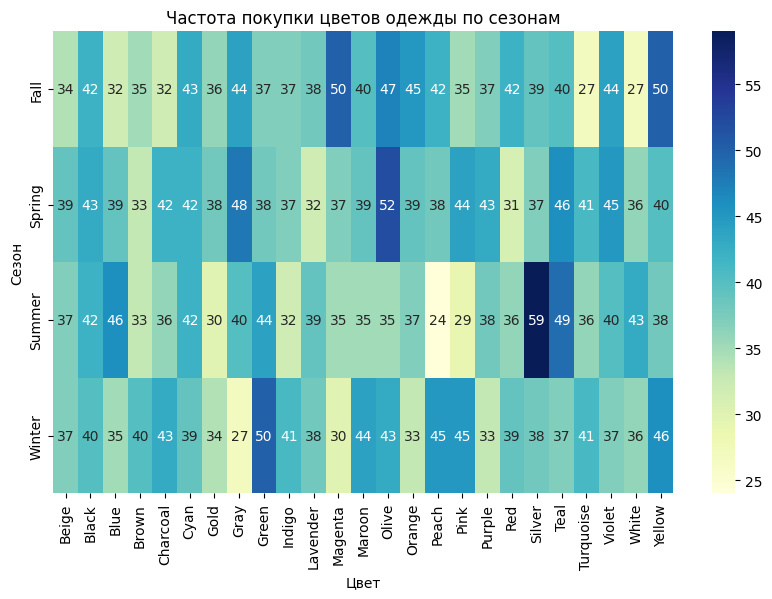

In [256]:
plt.figure(figsize=(10, 6))
sns.heatmap(color_season_df, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Частота покупки цветов одежды по сезонам')
plt.xlabel('Цвет')
plt.ylabel('Сезон')
plt.show()

Чёрный цвет практически одинаково популярен во все сезоны.

Зимой и летом зелёному цвету отдают предпочтение значительно чаще, чем в межсезонье.

Зимой люди предпочитают носить одежду глубоких и не сильно ярких цветов (исключение - серый). Чаще всего - зеленый цвет, реже всего - серый цвет.

Летом покупатели отдают предпочтение серебристой одежде наряду с классическим черным и синим цветом. Золотой, персиковый и розовый летом предпочитают реже всего.

Весной покупатели чаще всего выбирают оливковый и серый цвет. В общем соотношении преобладают яркие цвета (за исключением красного - его весной покупать не любят)

Осенью лидерами продаж являются цвета желтых и фиолетовых оттенков. Реже всего осенью люди покупают одежду белого и бирюзового цвета.


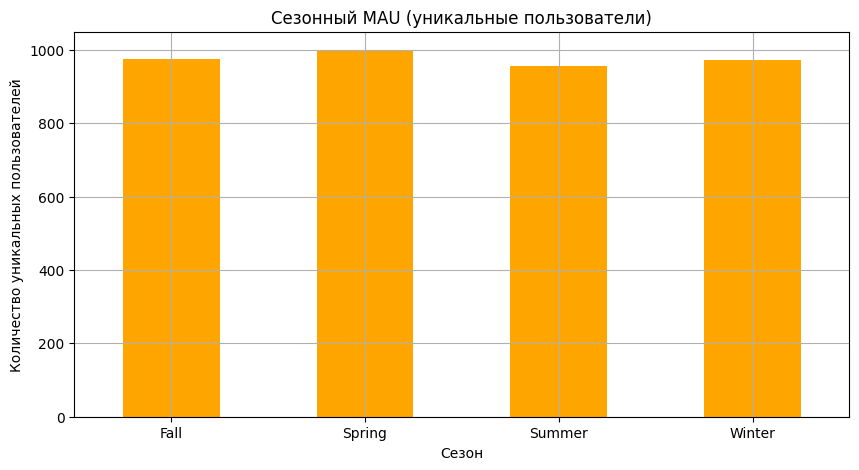

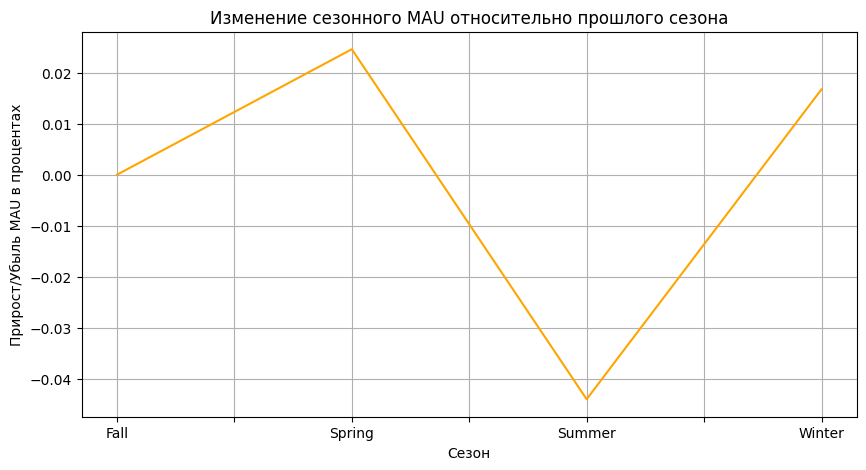

In [257]:
seasonal_mau = data.groupby('Season')['Customer ID'].nunique()
seasonal_mau_percental_change = seasonal_mau.pct_change().fillna(0)

seasonal_mau.plot(kind='bar', color='orange', figsize=(10, 5))
plt.title('Сезонный MAU (уникальные пользователи)')
plt.xlabel('Сезон')
plt.ylabel('Количество уникальных пользователей')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

seasonal_mau_percental_change.plot(kind='line', color='orange', figsize=(10,5))
plt.title('Изменение сезонного MAU относительно прошлого сезона')
plt.xlabel('Сезон')
plt.ylabel('Прирост/Убыль MAU в процентах')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [258]:
item_letters = ''.join(data['Item Purchased']).lower()
most_frequent = max(set(item_letters), key = item_letters.count)

In [259]:
print(f'Самый популярный товар: {most_popular_item}')
print(f'Пол, покупающий чаще всего: {top_gender_by_count}')
print(f'Возраст, покупающий чаще всего: {top_age_by_count}')
print(f'Пол, покупающий больше всего по сумме: {top_gender_by_sum}')
print(f'Возраст, покупающий больше всего по сумме: {top_age_by_sum}')
print(f'Самая популярная буква в названии одежды: {most_frequent}')

Самый популярный товар: Blouse
Пол, покупающий чаще всего: Male
Возраст, покупающий чаще всего: 69
Пол, покупающий больше всего по сумме: Female
Возраст, покупающий больше всего по сумме: 53
Самая популярная буква в названии одежды: s


<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [260]:
alcohol_data = pd.read_csv('data/drinks.csv')
alcohol_data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


В среднем пиво пьют чаще всего (в порциях)

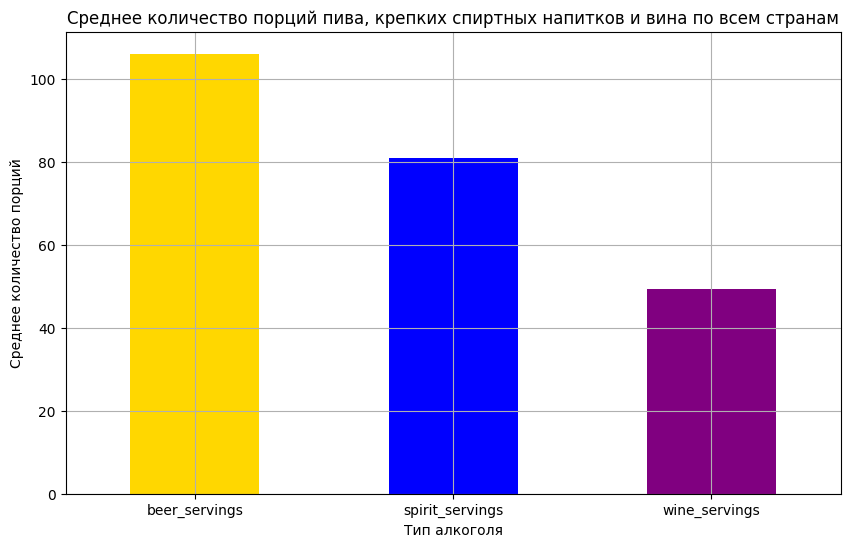

In [261]:
plt.figure(figsize=(10, 6))
alcohol_data[['beer_servings', 'spirit_servings', 'wine_servings']].mean().plot(kind='bar', color=['gold', 'blue', 'purple'])
plt.title('Среднее количество порций пива, крепких спиртных напитков и вина по всем странам')
plt.xlabel('Тип алкоголя')
plt.ylabel('Среднее количество порций')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [262]:
top_beer = alcohol_data.nlargest(10, 'beer_servings')[['country', 'beer_servings']]
top_wine = alcohol_data.nlargest(10, 'wine_servings')[['country', 'wine_servings']]
top_spirits = alcohol_data.nlargest(10, 'spirit_servings')[['country', 'spirit_servings']]
top_total_alcohol = alcohol_data.nlargest(10, 'total_litres_of_pure_alcohol')[['country', 'total_litres_of_pure_alcohol']]
bottom_total_alcohol = alcohol_data.nsmallest(10, 'total_litres_of_pure_alcohol')[['country', 'total_litres_of_pure_alcohol']]

Чаще всего пиво пьют в Намибии (???)

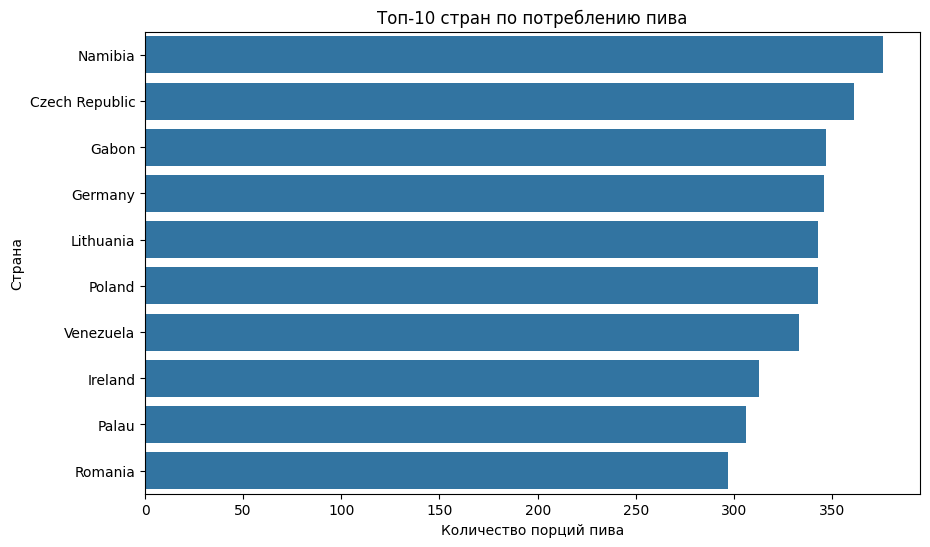

In [263]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_beer, x='beer_servings', y='country')
plt.title('Топ-10 стран по потреблению пива')
plt.xlabel('Количество порций пива')
plt.ylabel('Страна')
plt.show()

Вино чаще всего выбирают во Франции.

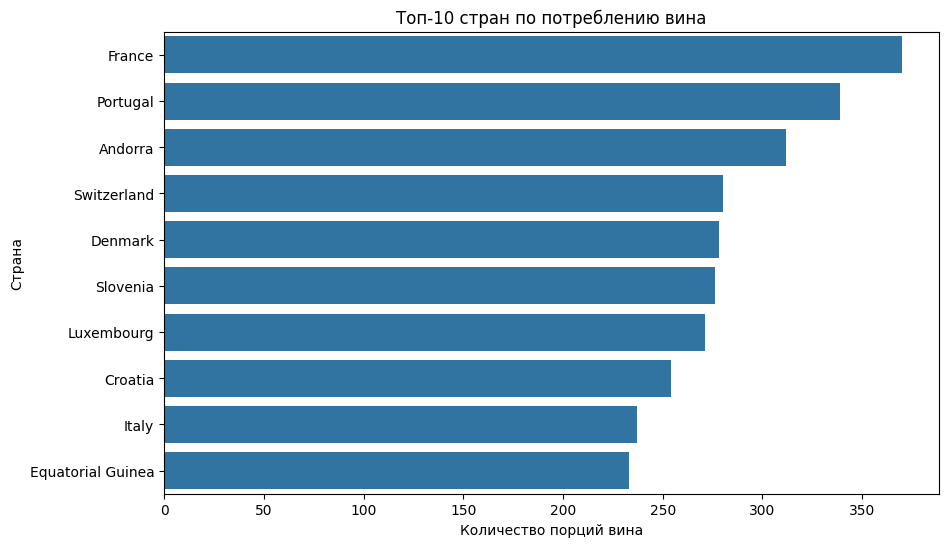

In [264]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_wine, x='wine_servings', y='country')
plt.title('Топ-10 стран по потреблению вина')
plt.xlabel('Количество порций вина')
plt.ylabel('Страна')
plt.show()

Крепкие напитки чаще всего выбирают в Гренаде.

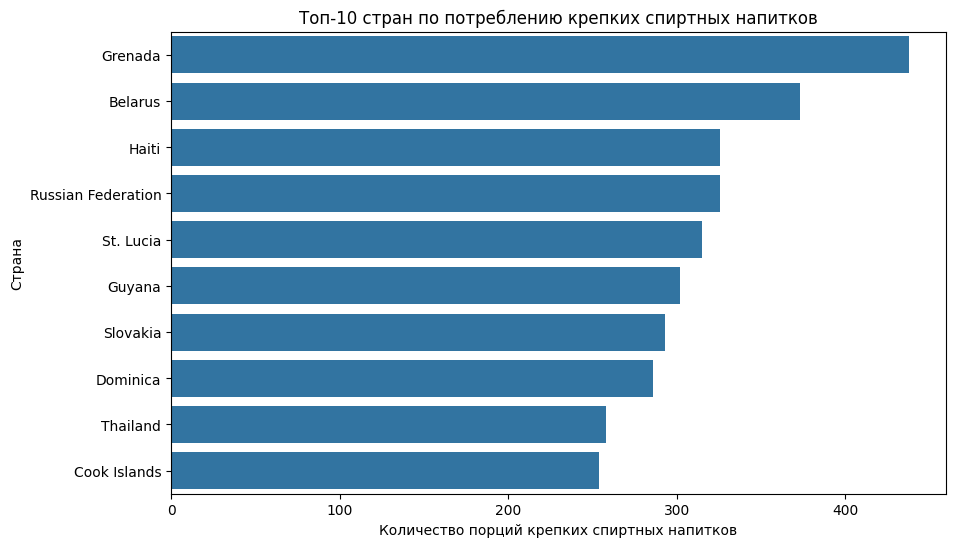

In [265]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_spirits, x='spirit_servings', y='country')
plt.title('Топ-10 стран по потреблению крепких спиртных напитков')
plt.xlabel('Количество порций крепких спиртных напитков')
plt.ylabel('Страна')
plt.show()

Больше всего пьют в Беларуси.

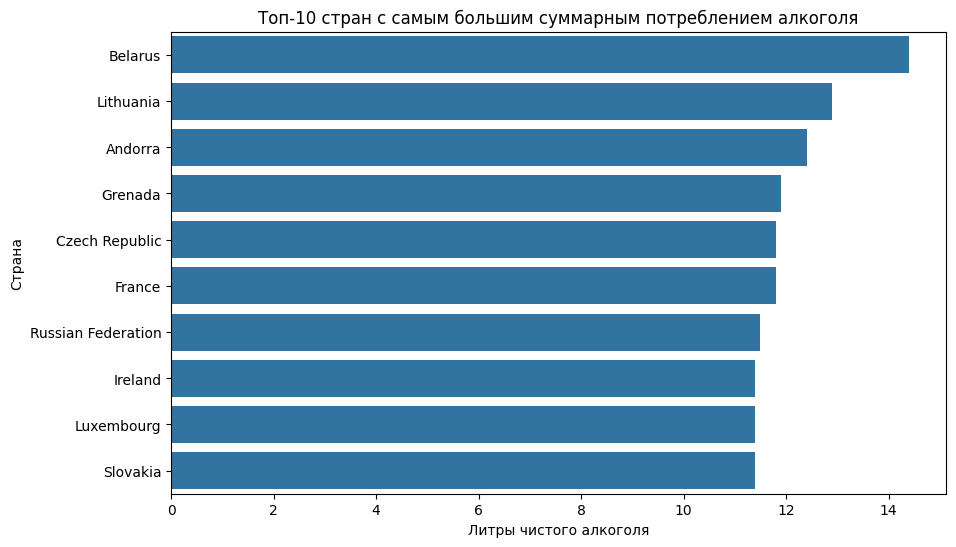

In [266]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_total_alcohol, x='total_litres_of_pure_alcohol', y='country')
plt.title('Топ-10 стран с самым большим суммарным потреблением алкоголя')
plt.xlabel('Литры чистого алкоголя')
plt.ylabel('Страна')
plt.show()

Страны, где пьют меньше всего (не пьют). Мусульманские страны и страны, по которым, кажется, просто нет данных.

/var/folders/lb/7qhs8szj79v9xqf1qwpg3_b40000gn/T/ipykernel_8483/3960087873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_total_alcohol, x='total_litres_of_pure_alcohol', y='country', palette='Greens_r')


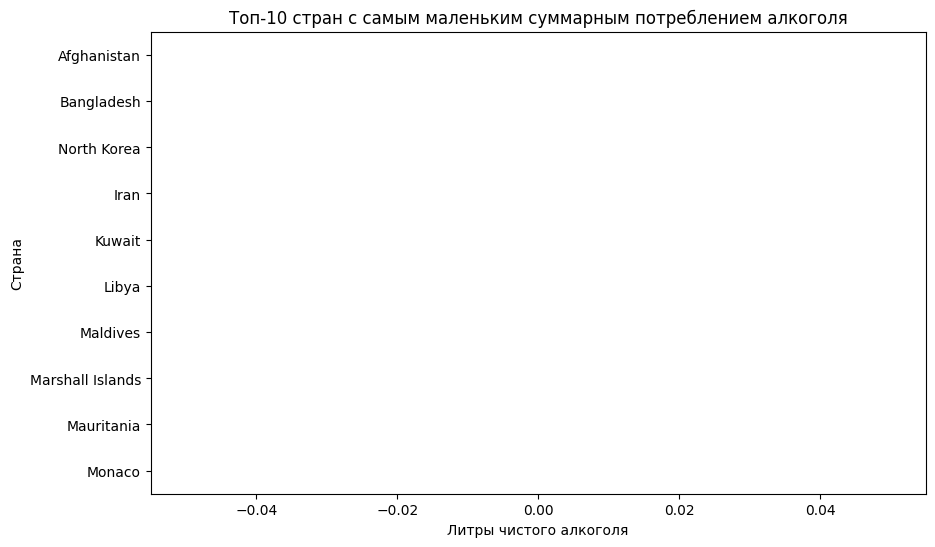

In [267]:
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_total_alcohol, x='total_litres_of_pure_alcohol', y='country', palette='Greens_r')
plt.title('Топ-10 стран с самым маленьким суммарным потреблением алкоголя')
plt.xlabel('Литры чистого алкоголя')
plt.ylabel('Страна')
plt.show()

<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 

In [268]:
tarant = pd.read_csv('data/tarantino.csv')
tarant

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
1889,Jackie Brown,word,motherfucker,141.93
1890,Jackie Brown,word,ass,142.43
1891,Jackie Brown,word,fucking,142.47
1892,Jackie Brown,word,goddamn,142.97


Доля проклятий и смертей по датасету.

In [269]:
word_death_ratio = tarant['type'].value_counts(normalize=True)
word_death_ratio

type
word     0.899683
death    0.100317
Name: proportion, dtype: float64

Доля употребления конкретных слов.

In [270]:
word_freq = tarant['word'].value_counts(normalize=True)
word_freq

word
fucking          0.238850
shit             0.129695
fuck             0.125000
n-word           0.105047
ass              0.082160
goddamn          0.066315
motherfucker     0.041080
bitch            0.037559
hell             0.026408
damn             0.021714
motherfucking    0.015845
fucked           0.014671
bullshit         0.008803
motherfuckers    0.008803
dick             0.008216
pussy            0.006455
asshole          0.005869
bastard          0.005869
bitches          0.005282
fucker           0.004695
assholes         0.002934
negro            0.002934
dicks            0.002934
asses            0.002347
shitty           0.002347
damned           0.001761
fucks            0.001761
shithead         0.001761
horseshit        0.001174
gooks            0.001174
japs             0.001174
cunt             0.001174
shitload         0.001174
cocksucker       0.001174
wetback          0.001174
fuckers          0.000587
horeshit         0.000587
jap              0.000587
shittie

Число проклятий, летальных исходов и их соотношение по фильмам.

In [271]:
event_counts = tarant.groupby(['movie', 'type']).size().unstack(fill_value=0)
event_counts

type,death,word
movie,,
Django Unchained,47,262
Inglorious Basterds,48,58
Jackie Brown,4,368
Kill Bill: Vol. 1,63,57
Kill Bill: Vol. 2,11,69
Pulp Fiction,7,469
Reservoir Dogs,10,421


In [272]:
event_counts['words_to_deaths_ratio'] = event_counts['word'] / event_counts['death']
event_counts

type,death,word,words_to_deaths_ratio
movie,,,
Django Unchained,47,262,5.574468
Inglorious Basterds,48,58,1.208333
Jackie Brown,4,368,92.000000
Kill Bill: Vol. 1,63,57,0.904762
Kill Bill: Vol. 2,11,69,6.272727
Pulp Fiction,7,469,67.000000
Reservoir Dogs,10,421,42.100000


Распределение времени между проклятиями для фильма "Криминальное чтиво" (так как в нём больше всего проклятий)

In [273]:
word_df = tarant[tarant['type'] == 'word']
word_df = word_df[word_df['movie'] == 'Pulp Fiction']
word_df = word_df.sort_values(by='minutes_in')
word_df['time_diff'] = word_df['minutes_in'].diff()
word_df.describe()

,minutes_in,time_diff
count,469.000000,468.000000
mean,82.301898,0.315449
std,47.925043,0.835973
min,0.520000,0.000000
25%,29.670000,0.030000
50%,96.320000,0.080000
75%,121.120000,0.250000
max,148.150000,11.550000


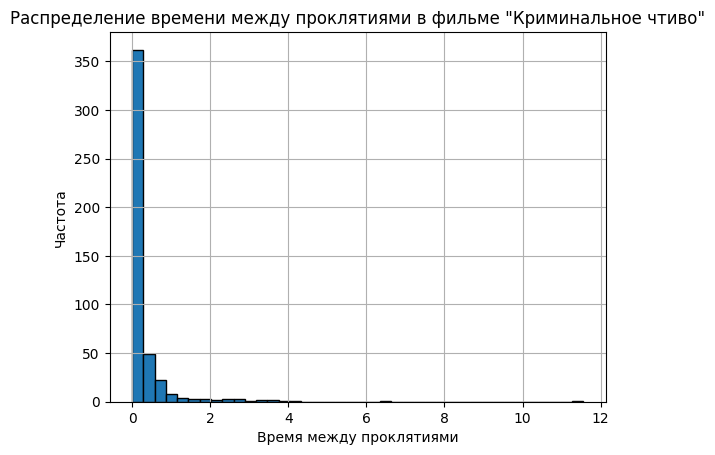

In [274]:
plt.hist(word_df['time_diff'], bins=40, edgecolor='black')
plt.xlabel('Время между проклятиями')
plt.ylabel('Частота')
plt.title('Распределение времени между проклятиями в фильме "Криминальное чтиво"')
plt.grid(True)
plt.show()